## Building a Fully Connected Feedforward Neural Network (FCFNN) for solving the equation f(x) = 5x^2 +10x -2 training the FCFNN plotting original f(x) and predicted f(x)

2025-08-30 01:46:16.147989: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-30 01:46:16.148094: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-30 01:46:16.150431: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-30 01:46:16.399571: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-30 01:46:18.765410: W tensorflow/compiler/

Model: "model"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 input_1 (InputLayer)        [(None, 1)]               0         Y          
                                                                            
 Hidden_Layer_1 (Dense)      (None, 8)                 16        Y          
                                                                            
 Hidden_Layer_2 (Dense)      (None, 16)                144       Y          
                                                                            
 Hidden_Layer_3 (Dense)      (None, 64)                1088      Y          
                                                                            
 Hidden_Layer_4 (Dense)      (None, 128)               8320      Y          
                                                                            
 Hidden_Layer_5 (Dense)      (None, 32)                4128  

2025-08-30 01:46:25.197614: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-08-30 01:46:25.383124: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/100
219/219 [==============================] - 3s 7ms/step - loss: 207911280.0000 - val_loss: 32458224.0000
Epoch 2/100
219/219 [==============================] - 1s 4ms/step - loss: 31674176.0000 - val_loss: 31143146.0000
Epoch 3/100
219/219 [==============================] - 1s 4ms/step - loss: 30539298.0000 - val_loss: 29857936.0000
Epoch 4/100
219/219 [==============================] - 1s 4ms/step - loss: 29204552.0000 - val_loss: 28678968.0000
Epoch 5/100
219/219 [==============================] - 1s 4ms/step - loss: 27795466.0000 - val_loss: 26942670.0000
Epoch 6/100
219/219 [==============================] - 1s 4ms/step - loss: 26098216.0000 - val_loss: 25151046.0000
Epoch 7/100
219/219 [==============================] - 1s 4ms/step - loss: 22819494.0000 - val_loss: 22095924.0000
Epoch 8/100
219/219 [==============================] - 1s 4ms/step - loss: 16133267.0000 - val_loss: 11434610.0000
Epoch 9/100
219/219 [==============================] - 1s 4ms/step - loss: 7614

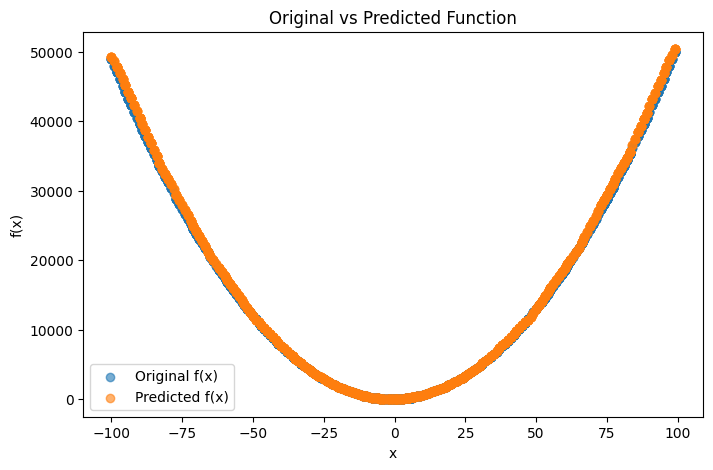

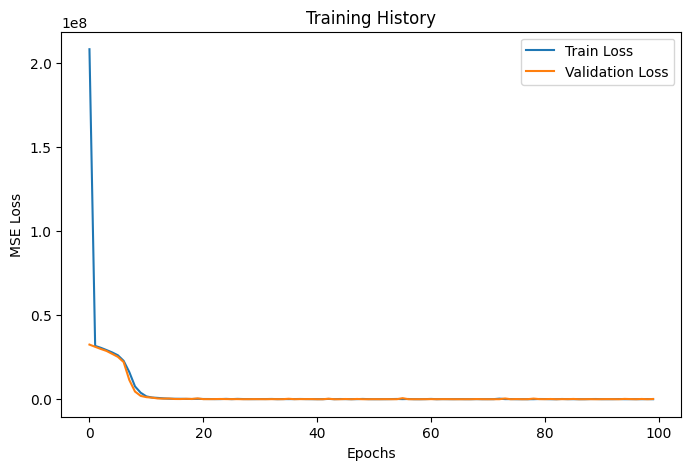

In [1]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import Model
import numpy as np
import matplotlib.pyplot as plt

# Polynomial function
def my_polynomial(x):
    return 5 * (x ** 2) + 10 * x - 2

# Generate dataset
def data_process():
    n = 10000
    x = np.random.randint(-100, 100, n)  # Random integers 0-99
    y = my_polynomial(x)
    x = x.reshape(-1, 1)  # Make it 2D for Keras
    y = y.reshape(-1, 1)
    return x, y

# Split dataset
def prepare_train_test_val():
    x, y = data_process()
    total_n = len(x)
    train_n = int(total_n * 0.7)
    val_n = int(total_n * 0.1)

    trainX = x[:train_n]
    trainY = y[:train_n]

    valX = x[train_n:train_n+val_n]
    valY = y[train_n:train_n+val_n]

    testX = x[train_n+val_n:]
    testY = y[train_n+val_n:]

    return (trainX, trainY), (valX, valY), (testX, testY)

# Build the model
def build_model():
    inputs = Input((1,))
    h1 = Dense(8, activation='relu', name='Hidden_Layer_1')(inputs)
    h2 = Dense(16, activation='relu', name='Hidden_Layer_2')(h1)
    h3 = Dense(64, activation='relu', name='Hidden_Layer_3')(h2)
    h4 = Dense(128, activation='relu', name='Hidden_Layer_4')(h3)
    h5 = Dense(32, activation='relu', name='Hidden_Layer_5')(h4)
    h6 = Dense(8, activation='relu', name='Hidden_Layer_6')(h5)
    outputs = Dense(1, name='Output_Layer')(h6)
    
    model = Model(inputs, outputs)
    model.summary(show_trainable=True)
    return model

# Main function
def main():
    model = build_model()
    model.compile(optimizer='adam', loss='mse')

    (trainX, trainY), (valX, valY), (testX, testY) = prepare_train_test_val()

    # Train the model
    history = model.fit(trainX, trainY, validation_data=(valX, valY), epochs=100, batch_size=32, verbose=1)

    # Evaluate on test data
    test_loss = model.evaluate(testX, testY)
    print(f"\nTest Mean Squared Error: {test_loss:.4f}")

    # Predict on test data
    y_pred = model.predict(testX)

    # Plot original vs predicted
    plt.figure(figsize=(8,5))
    plt.scatter(testX, testY, label="Original f(x)", alpha=0.6)
    plt.scatter(testX, y_pred, label="Predicted f(x)", alpha=0.6)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Original vs Predicted Function")
    plt.legend()
    plt.savefig("fx_prediction.png", dpi=300)  # save for LaTeX
    plt.show()

    # Plot training history
    plt.figure(figsize=(8,5))
    plt.plot(history.history['loss'], label="Train Loss")
    plt.plot(history.history['val_loss'], label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("MSE Loss")
    plt.title("Training History")
    plt.legend()
    plt.savefig("training_history.png", dpi=300)
    plt.show()

if __name__ == '__main__':
    main()
